# Multiple Time Frame Moving Averages Example

In this sample we will be downloading a timeseries of MSFT.O stockprice closes, for Hourly, Daily, Weekly and Monthly frequencies. We will then be creating a series of Simple Moving Averages (20, 50 & 100 period). I will also demonstrate how to resample the hourly timeseries to 4 Hour timeseries - using built-in functions of Pandas (this of course can be applied to other frequencies such as Minute - to generate 10 minute or 30 minute frequencies). Finally - I will plot these on a chart. 

First off..lets load the libraries we will be using, eikon (for data retrieval), pandas (for dataframes) and matplotlib (for charting) - and we need to generate an App_ID from the Eikon Scripting Proxy and pass this to the App to allow download of data...

In [66]:
import eikon as ek #v0.14
import pandas as pd #v19
import matplotlib as plt
ek.set_app_id('YOUR APP_ID HERE')

Next lets download some data and store the result in a few pandas dataframes - please note the use of the normalize=True parameter which you should use so that the dataframe is formatted correctly - this is important for both charting and calculation. We can also check we have downloaded data by looking at the tail (or head) of a dataframe...

In [110]:
Hourly = ek.get_timeseries(["VOD.L"], start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="hour", fields=["Close"], normalize=True)
Daily = ek.get_timeseries(["VOD.L"], start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="daily", fields=["Close"], normalize=True)
Weekly = ek.get_timeseries(["VOD.L"], start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="weekly", fields=["Close"], normalize=True)
Monthly = ek.get_timeseries(["VOD.L"], start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="monthly", fields=["Close"], normalize=True)
Hourly.tail()

,Date,Field,Security,Value
2181,2017-03-24 13:00:00,CLOSE,VOD.L,211.5500
2182,2017-03-24 14:00:00,CLOSE,VOD.L,211.2245
2183,2017-03-24 15:00:00,CLOSE,VOD.L,211.6000
2184,2017-03-24 16:00:00,CLOSE,VOD.L,211.6500
2185,2017-03-24 17:00:00,CLOSE,VOD.L,211.8000


Great - so we have data flowing through to our dataframe....however, notice in the first column we have sequence numbers - these are currently the index. In order to fully take advantage of many pandas features, we want to change the index to be a datetime type - which thankfully we have in the date column...

In [113]:
framelist =['Hourly','Daily','Weekly','Monthly']

for frame in framelist:
    vars()[frame] = vars()[frame].set_index('Date')

Hourly.tail()

,Field,Security,Value
Date,,,
2017-03-24 13:00:00,CLOSE,VOD.L,211.5500
2017-03-24 14:00:00,CLOSE,VOD.L,211.2245
2017-03-24 15:00:00,CLOSE,VOD.L,211.6000
2017-03-24 16:00:00,CLOSE,VOD.L,211.6500
2017-03-24 17:00:00,CLOSE,VOD.L,211.8000


Now I also want a 4 hour frequency frame, but I only have an hourly frequency...what to do? ...well thankfully pandas has some built-in functionality which allows us to resample the hourly data into (dis)aggregates thereof (known as downsampling)...in our case 4 hourly.

In [114]:
FourHour = Hourly.resample('4H').last().dropna()
FourHour.head()

,Field,Security,Value
Date,,,
2016-04-11 08:00:00,CLOSE,VOD.L,227.100000
2016-04-11 12:00:00,CLOSE,VOD.L,224.950000
2016-04-11 16:00:00,CLOSE,VOD.L,226.145462
2016-04-12 08:00:00,CLOSE,VOD.L,226.050000
2016-04-12 12:00:00,CLOSE,VOD.L,225.950000


Now that we have our resampled frame, lets generate some moving averages as new columns in each of the dataframes

In [115]:
framelist =['Hourly','FourHour','Daily','Weekly','Monthly']

for frame in framelist:
    vars()[frame]['MAV20'] = vars()[frame]['Value'].rolling(window=20).mean()
    vars()[frame]['MAV50'] = vars()[frame]['Value'].rolling(window=50).mean()
    vars()[frame]['MAV100'] = vars()[frame]['Value'].rolling(window=100).mean()
    
Hourly.tail()

,Field,Security,Value,MAV20,MAV50,MAV100
Date,,,,,,
2017-03-24 13:00:00,CLOSE,VOD.L,211.5500,209.283000,209.89438,207.322222
2017-03-24 14:00:00,CLOSE,VOD.L,211.2245,209.459225,209.93887,207.410967
2017-03-24 15:00:00,CLOSE,VOD.L,211.6000,209.636725,209.99087,207.503467
2017-03-24 16:00:00,CLOSE,VOD.L,211.6500,209.838225,210.02087,207.579967
2017-03-24 17:00:00,CLOSE,VOD.L,211.8000,210.060725,210.05287,207.664967


Voila! 3 shiny new moving averages in each frame. So, lets now plot these on a chart...

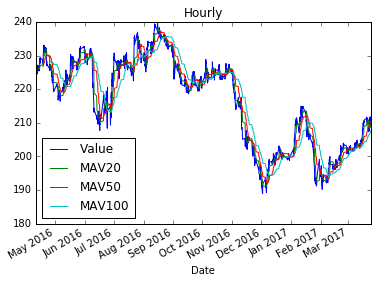

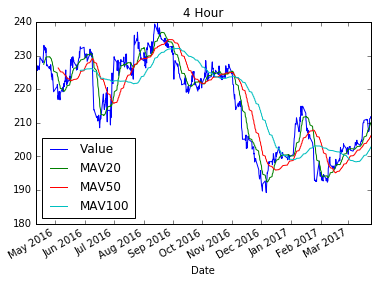

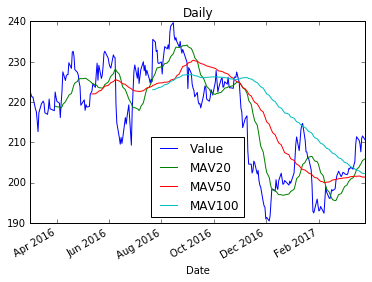

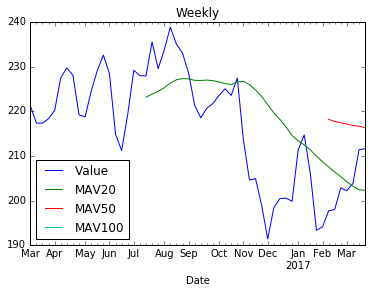

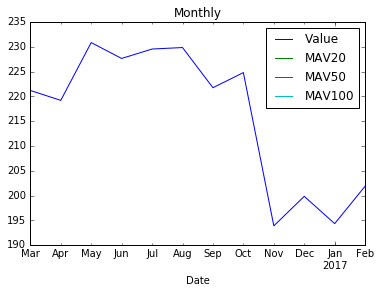

In [117]:
Hourly.plot(title="Hourly")
FourHour.plot(title="4 Hour")
Daily.plot(title="Daily")
Weekly.plot(title="Weekly")
Monthly.plot(title="Monthly")

Pretty simple right? 

Author: jason.ramchandani@tr.com